In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('restaurant.csv')
df.head(10)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101 votes,300
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219 votes,200


In [3]:
df.shape

(12690, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [5]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [6]:
#Dropping the irrelevant column
df=df.drop(['RESTAURANT_ID'],axis=1)

In [7]:
df['COST'].describe()

count    12690.000000
mean       655.252246
std        627.003540
min         20.000000
25%        300.000000
50%        500.000000
75%        800.000000
max      14000.000000
Name: COST, dtype: float64

    The average cost is 655 and the minimum and maximum cost is 20 and 14000 respectively.

In [8]:
#Removing 'votes' from the  VOTES column and converting to float type
df['VOTES']=df['VOTES'].str.rstrip(' votes').astype('float')

In [9]:
#Replacing NaN values in VOTES with 0 as null value in this column means that no votes have been given to the restaurant 
df['VOTES']=df['VOTES'].replace(np.NaN,0)

In [10]:
df['VOTES'].describe()

count    12690.000000
mean       376.231127
std        810.946942
min          0.000000
25%         39.250000
50%        132.000000
75%        405.000000
max      41186.000000
Name: VOTES, dtype: float64

In [11]:
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [12]:
df['RATING'].value_counts()

3.9    1238
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
NEW     707
3.4     575
4.3     556
-       495
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.2       2
2.0       2
Name: RATING, dtype: int64

In [13]:
#Replacing NEW and '-' with 0
df['RATING'].replace('NEW',0,inplace=True)
df['RATING'].replace('-',0,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     12690 non-null  object 
 1   CUISINES  12690 non-null  object 
 2   TIME      12690 non-null  object 
 3   CITY      12578 non-null  object 
 4   LOCALITY  12592 non-null  object 
 5   RATING    12688 non-null  object 
 6   VOTES     12690 non-null  float64
 7   COST      12690 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 793.2+ KB


In [15]:
#Converting the column to float datatype
df['RATING']=df['RATING'].astype('float64')

In [16]:
df['RATING'].describe()

count    12688.000000
mean         3.426836
std          1.179107
min          0.000000
25%          3.400000
50%          3.800000
75%          4.000000
max          4.900000
Name: RATING, dtype: float64

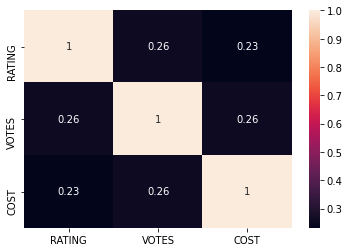

In [17]:
corr=df.corr()
sn.heatmap(corr,annot=True)
plt.show()

In [18]:
df.isnull().sum()

TITLE         0
CUISINES      0
TIME          0
CITY        112
LOCALITY     98
RATING        2
VOTES         0
COST          0
dtype: int64

In [19]:
df['CITY'].mode()

0    Chennai
dtype: object

In [20]:
df['LOCALITY'].mode()

0    Gachibowli
dtype: object

In [21]:
#Dropping the rows with null values as there are very few null values and also as it is not possible to simply replace the null values of City and Locality with their respective modes as it can cause mismatch between the cities and their localities
df=df.dropna()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12575 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     12575 non-null  object 
 1   CUISINES  12575 non-null  object 
 2   TIME      12575 non-null  object 
 3   CITY      12575 non-null  object 
 4   LOCALITY  12575 non-null  object 
 5   RATING    12575 non-null  float64
 6   VOTES     12575 non-null  float64
 7   COST      12575 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 884.2+ KB


In [23]:
df['TIME'].unique()

array(['11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)', '6pm – 11pm (Mon-Sun)',
       '11am – 3:30pm, 7pm – 11pm (Mon-Sun)', ...,
       '12:1pm – 4am (Mon-Sun)', '12:30pm – 9:45pm (Mon-Sun)',
       '12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...'], dtype=object)

In [24]:
df['TIME'].value_counts()

11am – 11pm (Mon-Sun)                                  1406
12noon – 12midnight (Mon-Sun)                           464
12noon – 11pm (Mon-Sun)                                 402
11am – 12midnight (Mon-Sun)                             309
10am – 10pm (Mon-Sun)                                   217
                                                       ... 
11am – 10pm (Mon-Sat),2pm – 10pm (Sun)                    1
11am – 11:30am (Mon-Sun)                                  1
12noon – 3pm, 7:45pm – 12midnight...                      1
11:30am – 10:30pm (Mon),11:30am – 10:15pm (Tue-Sun)       1
11am – 3pm, 7pm – 12midnight (Mon-Sun)                    1
Name: TIME, Length: 2663, dtype: int64

In [25]:
df['TIME']=df['TIME'].str.rstrip('...').astype('object')

In [26]:
#Picking out only the days in which the restaurants are open
time=list(df['TIME'])
Time=[]
for i in range(len(time)):
    if len(time[i].split(sep=','))==1:
        Time.append(time[i].split(sep='(')[-1])
    else:
        Time.append((time[i].split(sep=',')[-1]).split(sep='(')[-1])
Time

['Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 ' Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 ' Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Tue-Sun)',
 ' Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Tue-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 '12:30pm – 11:30pm',
 'Tue-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Tue-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 ' Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 '12:30pm',
 ' 11am –',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Mon-Sun)',
 'Fri-Su

In [27]:
df['Time']=Time
df['Time'].unique()

array(['Mon-Sun)', ' Sun)', 'Tue-Sun)', '12:30pm – 11:30pm', 'Sun)',
       '12:30pm', ' 11am –', 'Fri-Sun)', ' Sat', '9:30am –', ' 11am',
       ' Wed)', '9:30am – 10:30pm', '12noon –', ' Fri',
       '12midnight – 1am', '1pm –', ' Thu', ' 7pm –', ' Closed',
       'Sat-Sun)', '11:30am – 11:30pm', ' 7:30pm – 9:30pm',
       ' 12:30pm – 4pm', ' Wed', ' 12noon', ' 8pm –', 'Wed-Sun)',
       ' 6:30pm –', ' 6pm – 11pm', ' 3pm', '12noon – 12:30AM',
       ' 11:30am –', ' 3pm –', '9am – 10:33pm', ' 10am',
       ' 12noon – 11:1pm', ' 12midnight', '12noon – 12midnight',
       '11:30am', '12noon', ' 5pm –', '11am – 12midnight', '10am',
       ' 7pm – 11:30pm', 'Mon', '9:5am', '7:30am –', 'Wed', '12:30pm –',
       ' Tue', ' 12noon –', 'Not Available', '10:30am – 7:30pm',
       '8am – 12midnight', '12noon – 1am', '10:30am – 12midnight', ' 6pm',
       '7am', ' 4pm –', '11:30am – 12midnight', ' 7pm – 11pm', '9am –',
       'Tue-Sat)', ' 10:39am –', ' 5:30pm', ' 8am –', '11:30am –',
       '12

In [28]:
df['Time'].value_counts()

Mon-Sun)             10739
Tue-Sun)               236
Sun)                   219
 Sun)                  161
Sat-Sun)                99
                     ...  
12:30pm – 10:30pm        1
7am – 12noon             1
6:30am –                 1
 7pm – 11:15pm           1
 4pm – 12midnight        1
Name: Time, Length: 270, dtype: int64

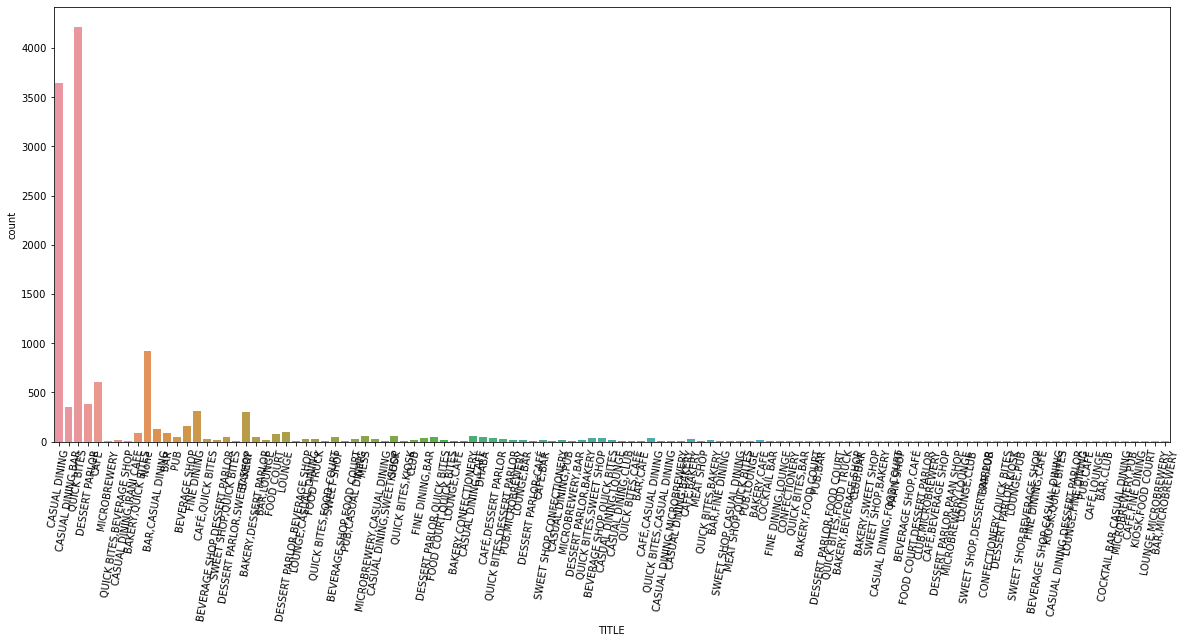

QUICK BITES                    4209
CASUAL DINING                  3642
None                            923
CAFÉ                            603
DESSERT PARLOR                  381
                               ... 
BEVERAGE SHOP,CASUAL DINING       1
MEAT SHOP                         1
QUICK BITES,FOOD TRUCK            1
CAFÉ,LOUNGE                       1
BAKERY,CONFECTIONERY              1
Name: TITLE, Length: 113, dtype: int64


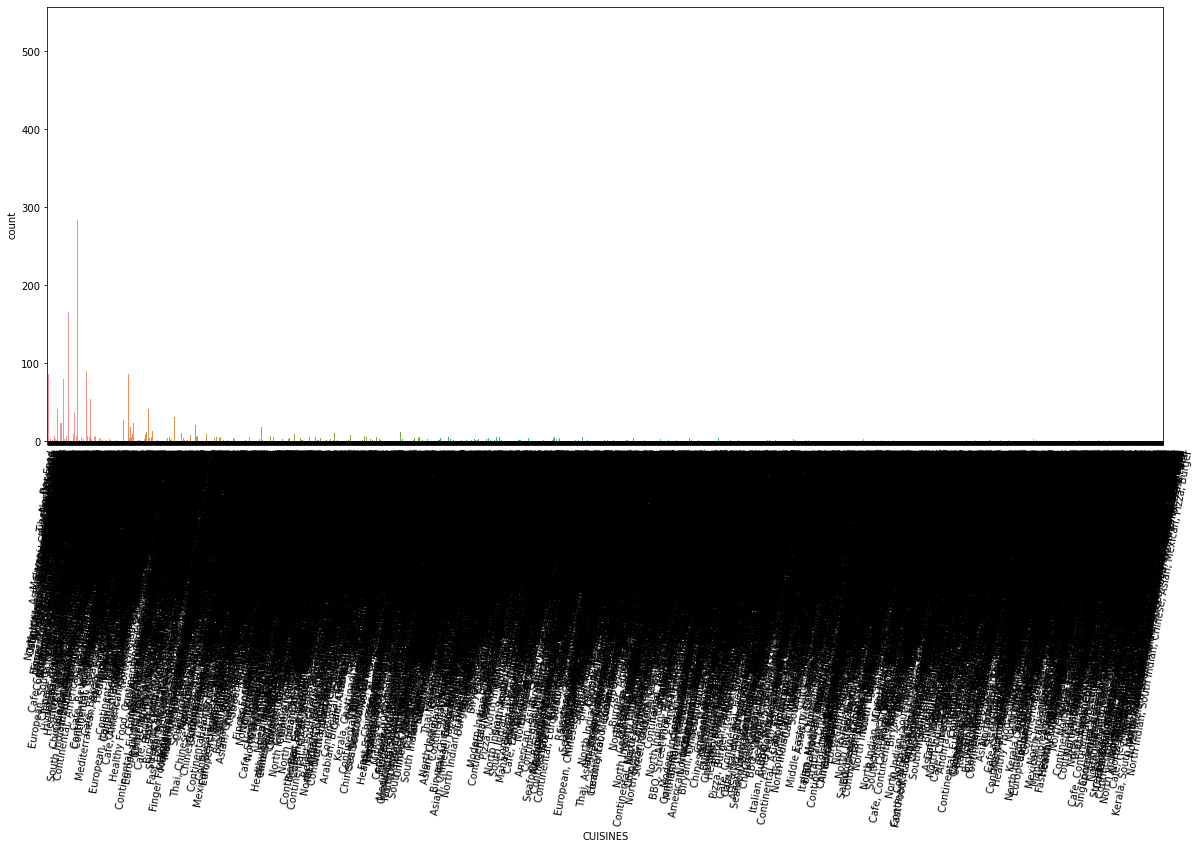

South Indian                                                              531
North Indian                                                              518
North Indian, Chinese                                                     497
Fast Food                                                                 284
Chinese                                                                   166
                                                                         ... 
Biryani, Fast Food, Chinese, Beverages, Sandwich                            1
South Indian, Chettinad, Chinese, North Indian                              1
North Indian, Chinese, Italian, Finger Food, Asian, Bar Food, American      1
Fast Food, Italian, Continental                                             1
North Indian, Chinese, Fast Food, Momos                                     1
Name: CUISINES, Length: 4121, dtype: int64


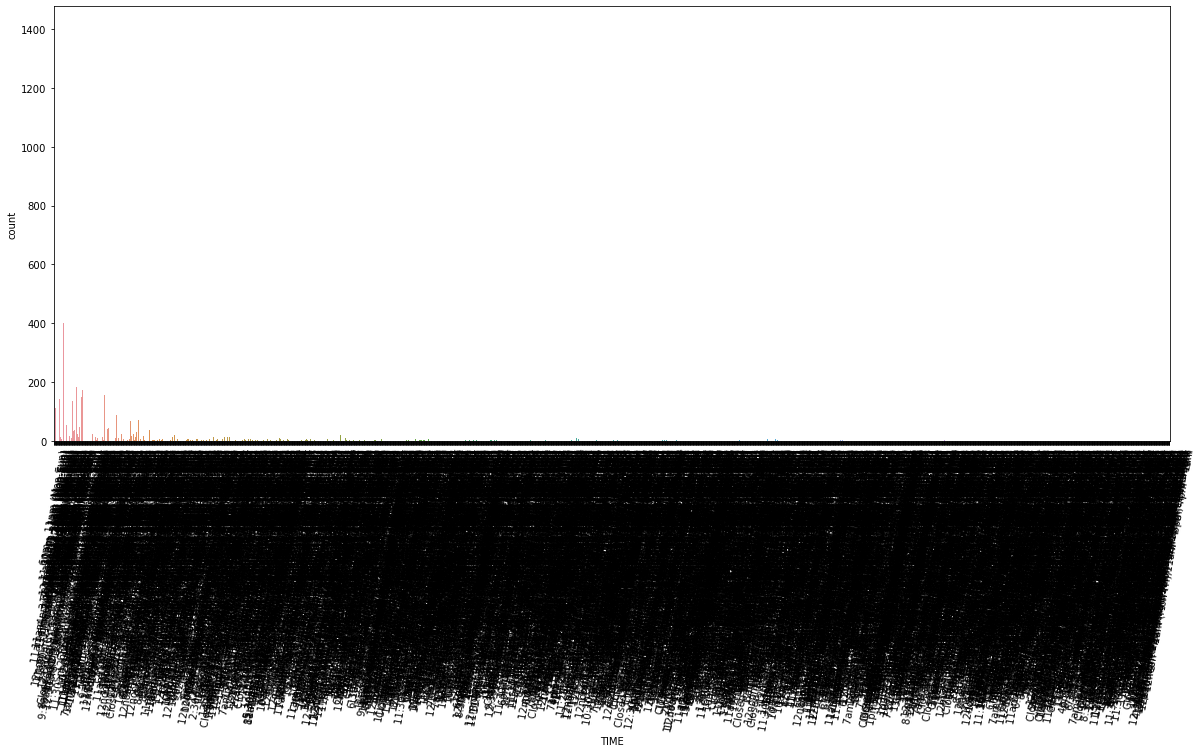

11am – 11pm (Mon-Sun)                              1406
12noon – 12midnight (Mon-Sun)                       464
12noon – 11pm (Mon-Sun)                             402
11am – 12midnight (Mon-Sun)                         309
10am – 10pm (Mon-Sun)                               217
                                                   ... 
10:30am – 8pm (Mon-Sun)                               1
11am – 11pm (Mon, Wed, Thu, Fri, Sat, Sun), 3pm       1
10am – 11pm (Mon-Thu),10am – 1am (Fri-Sat),9am        1
Closed (Mon),12noon – 9:30pm (Tue-Sun)                1
1pm – 4pm, 7pm – 12midnight (Mon-Sun)                 1
Name: TIME, Length: 2663, dtype: int64


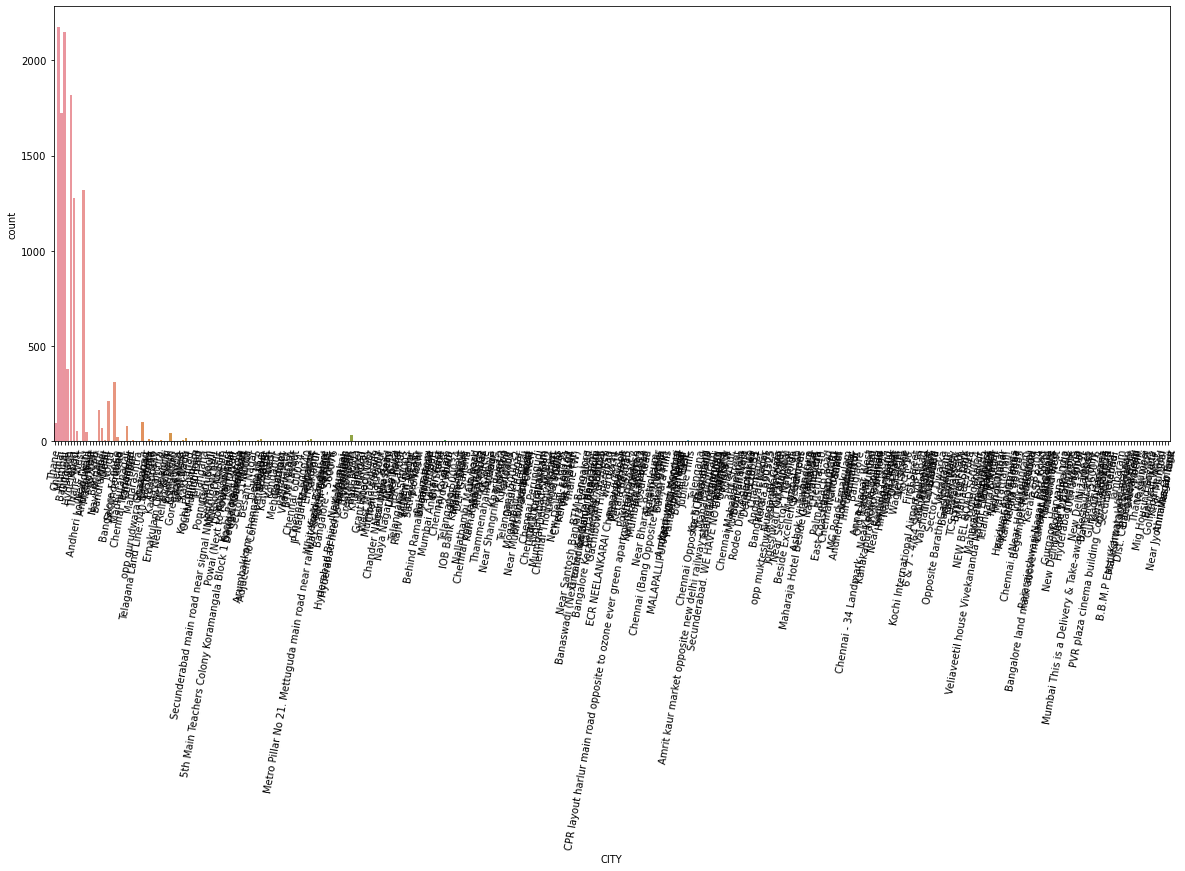

Chennai             2174
Bangalore           2149
Hyderabad           1818
Mumbai              1722
New Delhi           1321
                    ... 
Masab Tank             1
Anna Nagar East        1
Naharpar               1
Chennai - 600040       1
Chennai Chrompet       1
Name: CITY, Length: 358, dtype: int64


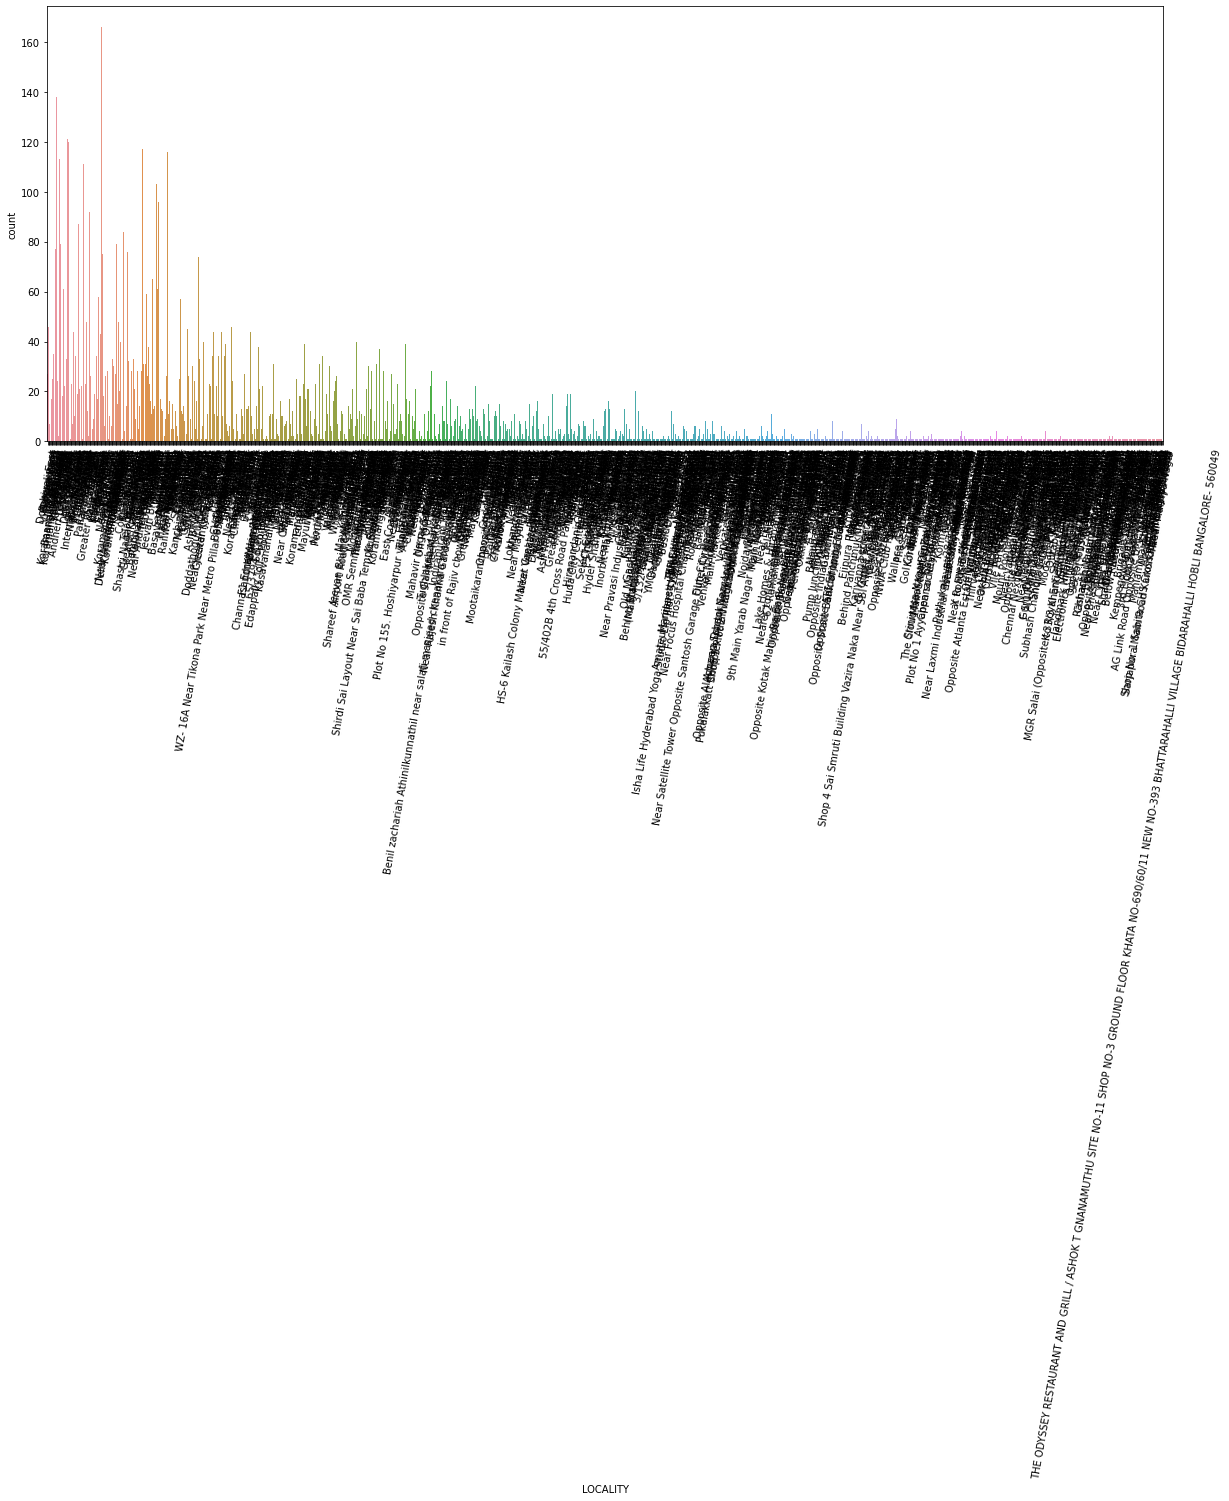

Gachibowli                            166
Indiranagar                           138
Edappally                             122
Kakkanad                              121
HSR                                   120
                                     ... 
Thevara junction                        1
Near Basavanagudi                       1
South Bangalore Urban Marathahalli      1
sector 42                               1
Ground Floor                            1
Name: LOCALITY, Length: 1413, dtype: int64


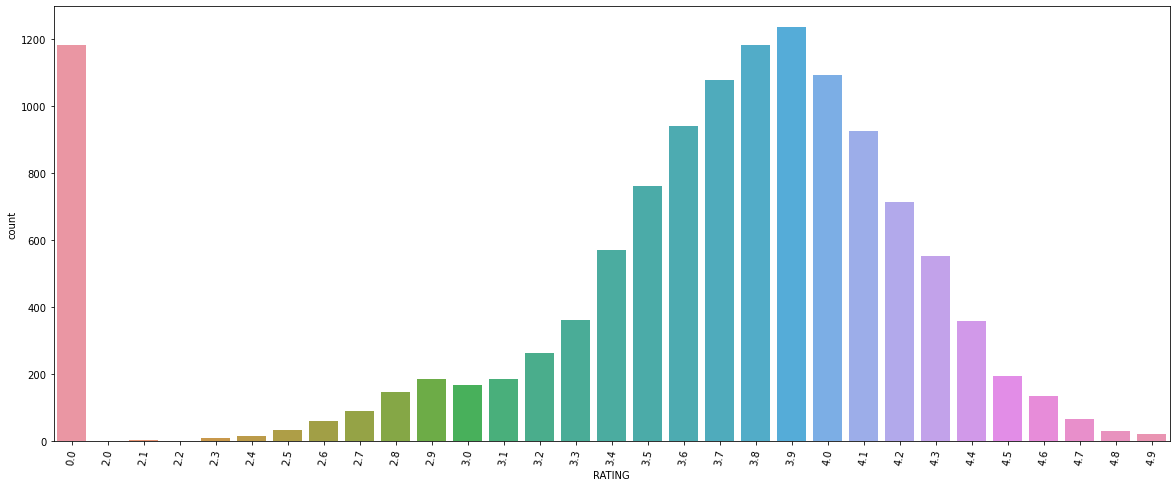

3.9    1236
3.8    1184
0.0    1182
4.0    1092
3.7    1077
3.6     940
4.1     926
3.5     762
4.2     714
3.4     570
4.3     553
3.3     363
4.4     359
3.2     265
4.5     196
2.9     186
3.1     185
3.0     169
2.8     146
4.6     134
2.7      89
4.7      66
2.6      61
2.5      35
4.8      31
4.9      22
2.4      15
2.3      10
2.1       3
2.2       2
2.0       2
Name: RATING, dtype: int64


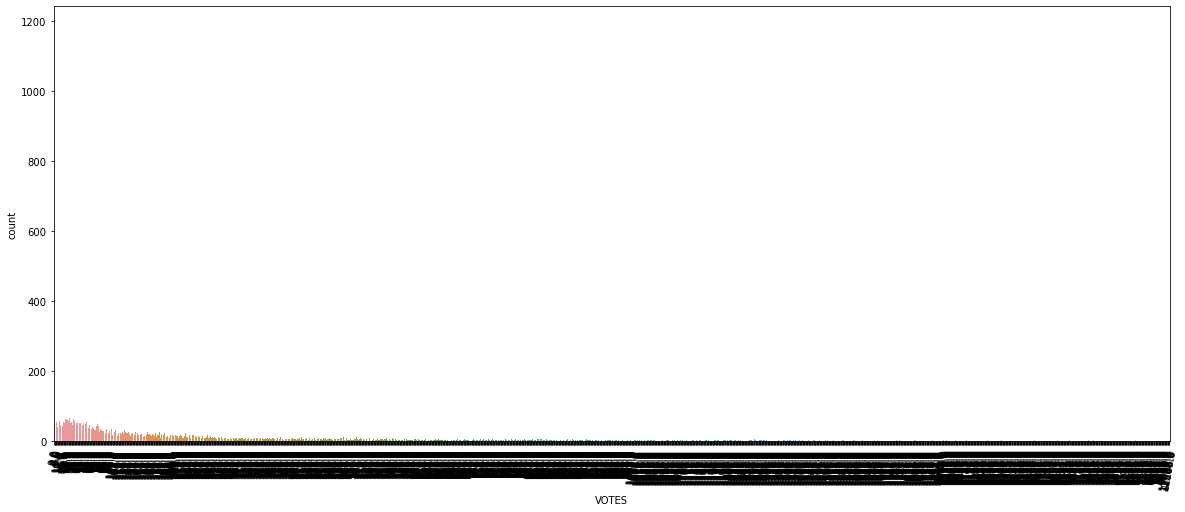

0.0       1182
44.0        69
29.0        65
38.0        65
28.0        65
          ... 
1123.0       1
1420.0       1
3508.0       1
1374.0       1
2055.0       1
Name: VOTES, Length: 1847, dtype: int64


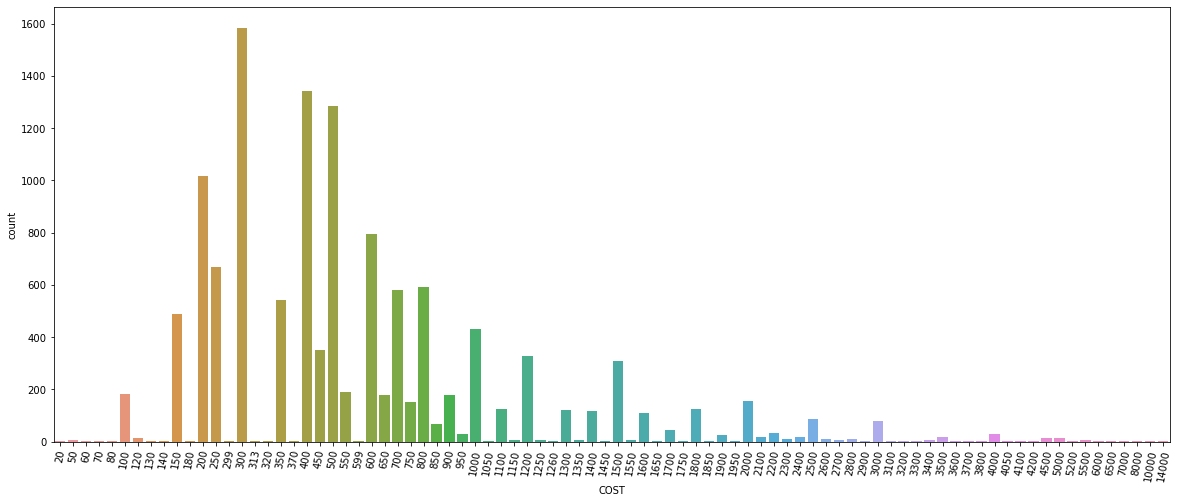

300      1585
400      1343
500      1284
200      1018
600       794
         ... 
4100        1
70          1
14000       1
1950        1
80          1
Name: COST, Length: 86, dtype: int64


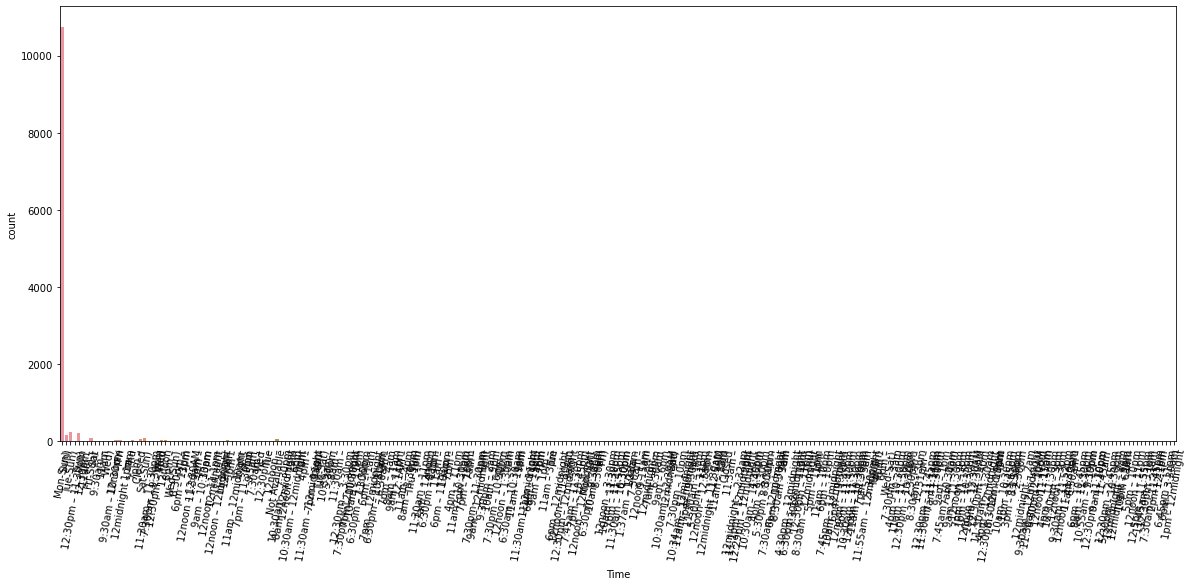

Mon-Sun)          10739
Tue-Sun)            236
Sun)                219
 Sun)               161
Sat-Sun)             99
                  ...  
 12:31pm –            1
 6:45pm – 11pm        1
 3pm – 11:30pm        1
 8am – 1am            1
11am – 11pm           1
Name: Time, Length: 270, dtype: int64


In [30]:
for col in df.columns:
    plt.subplots(figsize=(20,8))
    sn.countplot(x=col,data=df)
    plt.xticks(rotation=80)
    plt.show()
    print(df[col].value_counts())

In [29]:
#Encoding all the categorical data
from sklearn.preprocessing import LabelEncoder
l=['TITLE','CITY','LOCALITY','Time','CUISINES']
for i in l:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])
df.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Time
0,31,2604,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",319,285,3.6,49.0,1200,258
1,33,283,6pm – 11pm (Mon-Sun),67,1044,4.2,30.0,1500,258
2,31,2952,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",67,1099,3.8,221.0,800,258
3,95,4096,11:30am – 1am (Mon-Sun),221,136,4.1,24.0,800,258
4,50,1749,11am – 1am (Mon-Sun),221,620,3.8,165.0,300,258


In [30]:
#Dropping the extra column
df=df.drop(['TIME'],axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12575 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     12575 non-null  int32  
 1   CUISINES  12575 non-null  int32  
 2   CITY      12575 non-null  int32  
 3   LOCALITY  12575 non-null  int32  
 4   RATING    12575 non-null  float64
 5   VOTES     12575 non-null  float64
 6   COST      12575 non-null  int64  
 7   Time      12575 non-null  int32  
dtypes: float64(2), int32(5), int64(1)
memory usage: 638.6 KB


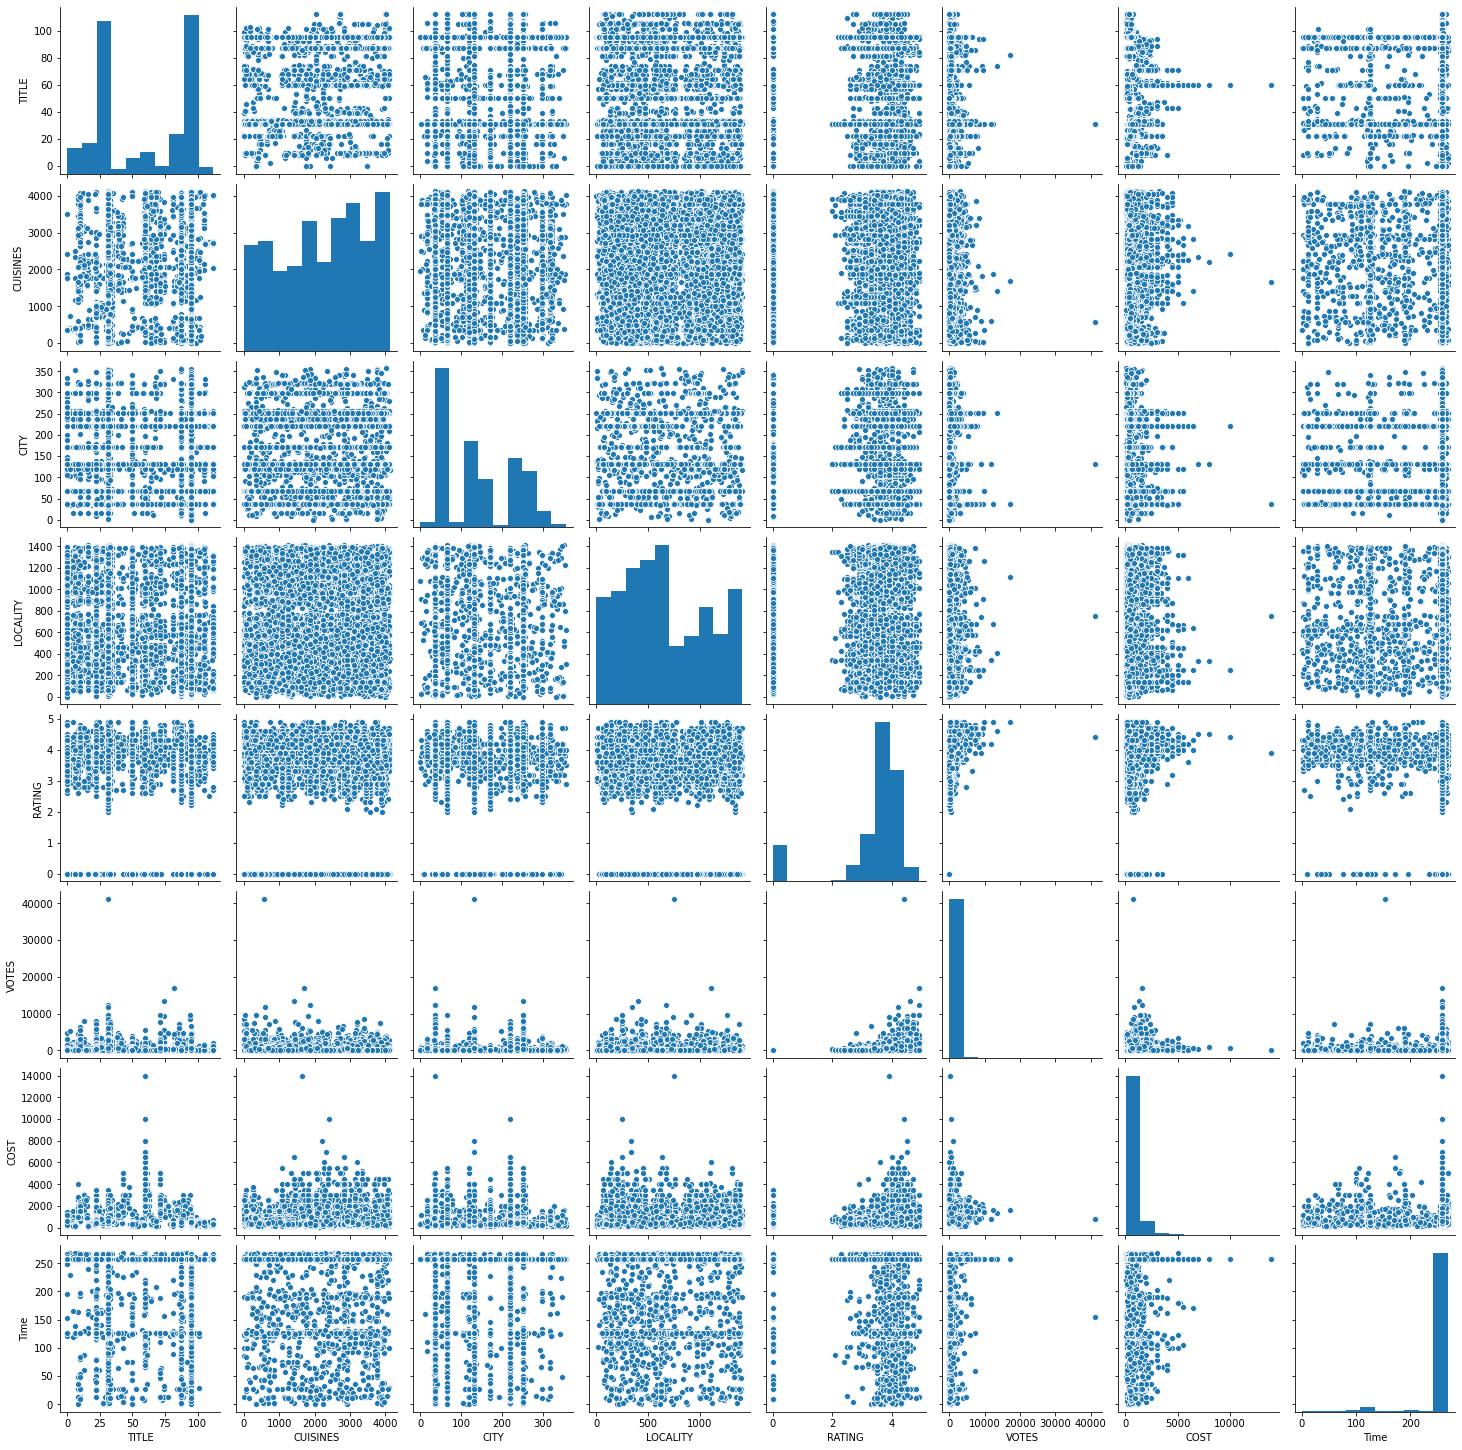

In [38]:
sn.pairplot(df)
plt.show()

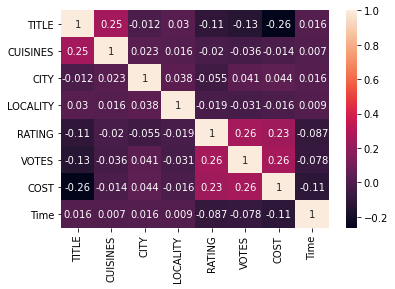

In [32]:
#Checking correlation
corr=df.corr()
sn.heatmap(corr,annot=True)
plt.show()

    Rating and votes have good positive correlation whereas title has high negative correlation with target variable

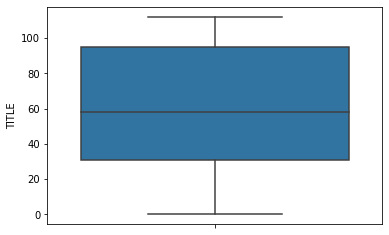

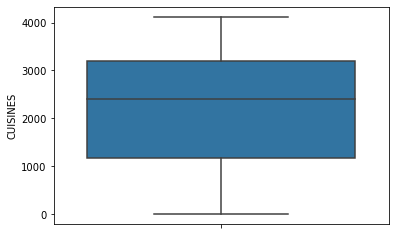

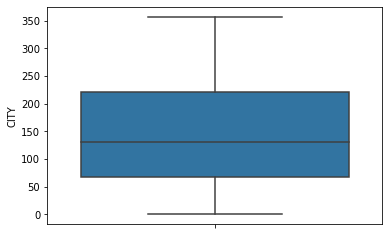

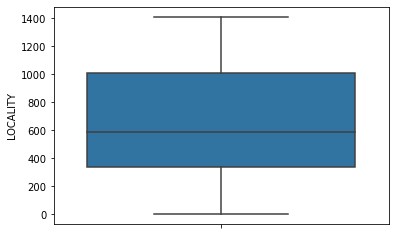

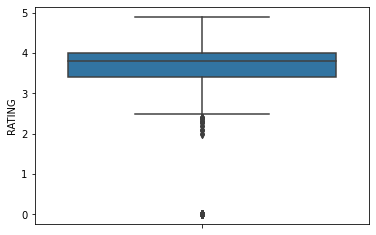

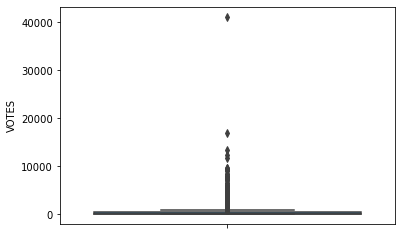

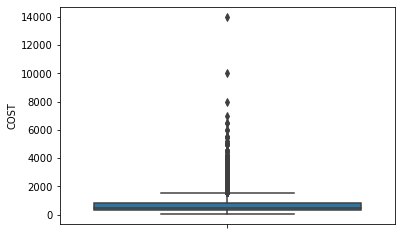

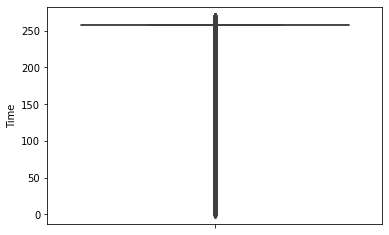

In [33]:
for col in df.describe().columns:
    sn.boxplot(df[col],orient='v')
    plt.show()

In [34]:
#Removing outliers
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
df1.shape, df.shape

((11751, 8), (12575, 8))

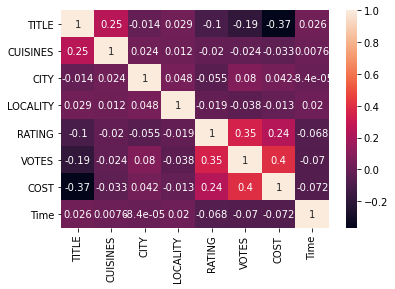

In [35]:
corr=df1.corr()
sn.heatmap(corr,annot=True)
plt.show()

In [36]:
df1.skew()

TITLE      -0.072746
CUISINES   -0.214153
CITY        0.269061
LOCALITY    0.330435
RATING     -2.175615
VOTES       2.609664
COST        1.841458
Time       -4.706851
dtype: float64

In [38]:
#Dropping the column of Time as it has very large number of outliers, very high skewness, and low correlation
df1=df1.drop(['Time'],axis=1)

In [39]:
#Removing skewness
df1['VOTES']=np.log1p(df1['VOTES'])
df1['RATING']=np.log1p(df1['RATING'])

In [40]:
df1.skew()

TITLE      -0.072746
CUISINES   -0.214153
CITY        0.269061
LOCALITY    0.330435
RATING     -2.531630
VOTES      -0.882913
COST        1.841458
dtype: float64

In [41]:
x=df1.drop(['COST'],axis=1)
y=df1['COST']

In [42]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sx=sc.fit_transform(x)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

In [44]:
best_rstate=0
accu=0
for i in range(0,50):
    train_x,test_x,train_y,test_y=train_test_split(sx,y,test_size=0.2,random_state=i)
    lg=RandomForestRegressor()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    temp_acc=r2_score(test_y,pred)
    if temp_acc>accu:
        accu=temp_acc
        best_rstate=i

print(f'Best accuracy {accu*100} found on random_state {best_rstate}')

Best accuracy 70.23474781913347 found on random_state 39


In [50]:
train_x,test_x,train_y,test_y=train_test_split(sx,y,test_size=0.2,random_state=39)

models=[LinearRegression(),SVR(),SVR(kernel='linear'),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor(),ExtraTreesRegressor()]
for m in models:
    m.fit(train_x,train_y)
    predm=m.predict(test_x)
    print(m)
    print('r2_score', r2_score(test_y,predm))
    print('MAE:',mean_absolute_error(test_y,predm))
    print('MSE:',mean_squared_error(test_y,predm))
    print('RMSE:',np.sqrt(mean_squared_error(test_y,predm)))
    print('\n')

LinearRegression()
r2_score 0.2407452067374568
MAE: 262.2745344379299
MSE: 146840.9307685342
RMSE: 383.19829170878904


SVR()
r2_score 0.1530386943729246
MAE: 248.6305539700934
MSE: 163803.49198560437
RMSE: 404.7264409272075


SVR(kernel='linear')
r2_score 0.17561507649290786
MAE: 251.93996764520458
MSE: 159437.18835037912
RMSE: 399.2958656815509


RandomForestRegressor()
r2_score 0.7016386419409504
MAE: 164.401006721196
MSE: 57703.500737209135
RMSE: 240.21552975860894


AdaBoostRegressor()
r2_score 0.3123471092787675
MAE: 269.34872560960724
MSE: 132993.0234424776
RMSE: 364.6820854422076


GradientBoostingRegressor()
r2_score 0.6718105049575223
MAE: 172.9495931607885
MSE: 63472.30382756166
RMSE: 251.93710291968046


BaggingRegressor()
r2_score 0.67604430277365
MAE: 170.36453417323258
MSE: 62653.48145393588
RMSE: 250.30677468645524


ExtraTreesRegressor()
r2_score 0.68400645688764
MAE: 169.72728767900185
MSE: 61113.58979780708
RMSE: 247.21162957637546




In [51]:
from sklearn.linear_model import Lasso
para={'alpha':[.0001,.001,.01,.1,1], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,para)
clf.fit(train_x,train_y)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [52]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(train_x,train_y)
pred_ls=ls.predict(test_x)
r2=r2_score(test_y,pred_ls)
print('r2 score',r2*100)

r2 score 24.06493631162957


In [53]:
from sklearn.linear_model import Ridge
para={'alpha':[.0001,.001,.01,.1,1], 'random_state':list(range(0,10)),'copy_X':[True,False],'fit_intercept':[True,False],'normalize':[True,False]}
rd=Ridge()
clf=GridSearchCV(rd,para)
clf.fit(train_x,train_y)
print(clf.best_params_)

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0}


In [54]:
rd=Ridge(alpha=0.001,copy_X=True,fit_intercept=True,normalize=True,random_state=0)
rd.fit(train_x,train_y)
pred_rd=rd.predict(test_x)
r2score=r2_score(test_y,pred_rd)
print('r2 score',r2score*100)

r2 score 24.07245165822729


In [57]:
parameter={'n_estimators':[50,100,150,200],
           'max_features':['auto','sqrt','log2']}

In [58]:
#Hypertuning
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(RandomForestRegressor(),parameter,scoring='r2')
gcv.fit(train_x,train_y)
gcv.best_estimator_
gcv_pred=gcv.best_estimator_.predict(test_x)
print('r2_score', r2_score(test_y,gcv_pred))

r2_score 0.7060453180540922


In [59]:
import pickle
file='restaurant_cost.pkl'
pickle.dump(gcv,open(file,'wb'))